**Download** (right-click, save target as ...) this page as a jupyterlab notebook [Lab 30](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab30/Lab30.ipynb)

___

# <font color=darkblue>Laboratory 30: Logarithmic and Power-Law Models </font>

**Medrano, Giovanni**

**R11521018**

ENGR 1330 Laboratory 30 - In Lab

___


## Background

The last couple lessons contain the needed logic, so just apply to the problem below

## Exercise 1

Using methods in the lesson, fit an appropriate data model to the voltage versus time data below. Use the data model to determine

1. What voltage do you expect after 1.5 seconds?
2. What voltage do you expect after 15.0 seconds?
3. How long will it take for the voltage to decline to 1.5 volts?
4. How long will it take for the voltage to decline to 0.17 volts?

|Time(sec)|Voltage(V)|
|---:|---:|
|0|9.8|
|1|5.9|
|2|3.9|
|3|2.1|
|4|1.0|
|5|0.8|
|6|0.6|
|7|0.4|
|8|0.3|
|9|0.2|
|10|0.1|


In [ ]:
# Load the necessary packages
# build the data lists
# build a dataframe
# Initialise and fit regression model using `statsmodels`
# Predict values
# Plot regression against actual data
# Is the model "good" if not try a different data model (linear,exponential,power law,logarithmic,polynomial)

# with your "good" model answer the questions

In [1]:
t = [0,1,2,3,4,5,6,7,8,9,10]
v = [9.8,5.9,3.9,2.1,1.0,.8,.6,.4,.3,.2,.1]
import math
x = t
y = []
for i in range(len(x)):
    y.append(math.log(v[i]))
    

In [2]:
#Load the necessary packages
import numpy as np
import pandas as pd
import statistics 
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf # here is the regression package to fit lines
data = pd.DataFrame({'X':t, 'Y':y}) # we use X,Y as column names for simplicity
data.head()

,X,Y
0,0,2.282382
1,1,1.774952
2,2,1.360977
3,3,0.741937
4,4,0.000000


In [3]:
# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Y ~ X', data=data) # model object constructor syntax
model = model.fit()

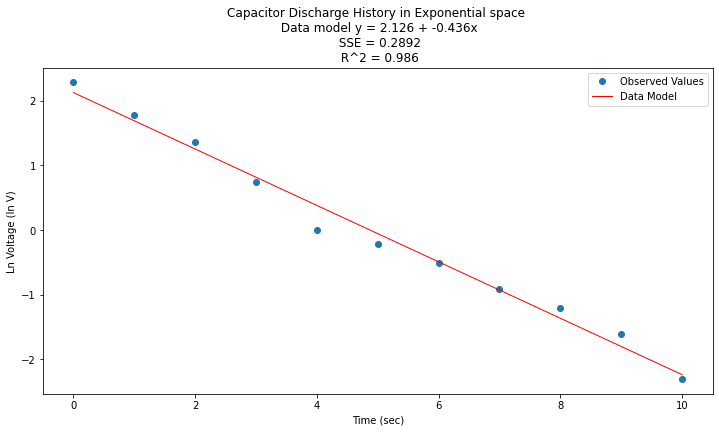

In [4]:
# Predict values
y_pred = model.predict()

beta0 = model.params[0] # the fitted intercept
beta1 = model.params[1]
sse = model.ssr
rsq = model.rsquared

titleline = "Capacitor Discharge History in Log space \n Data model y = " + str(round(beta0,3)) + " + " + str(round(beta1,3)) + "x" # put the model into the title
titleline = titleline + '\n SSE = ' + str(round(sse,4)) + '\n R^2 = ' + str(round(rsq,3)) 

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data['X'], data['Y'], 'o')           # scatter plot showing actual data
plt.plot(data['X'], y_pred, 'r', linewidth=1)   # regression line
plt.xlabel('Time (sec)')
plt.ylabel('Ln Voltage (ln V)')
plt.legend(['Observed Values','Data Model'])
plt.title(titleline)

plt.show();

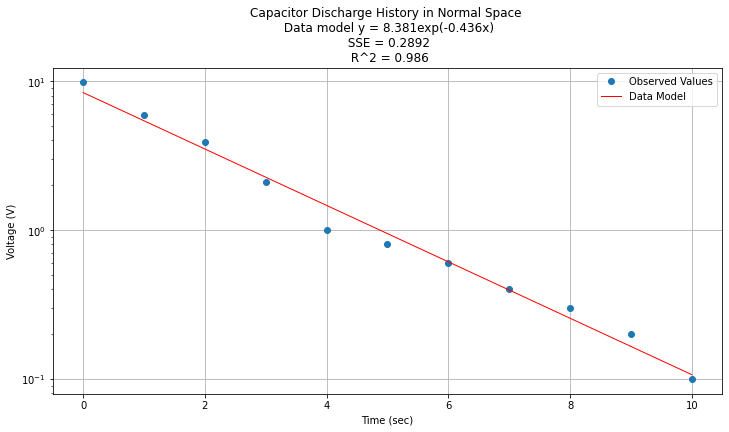

In [5]:
data['Yorg']=data['Y'].apply(math.exp)
data['Ymod']=math.exp(beta0)*(beta1*data['X']).apply(math.exp)
#data.head()

titleline = "Capacitor Discharge History in Normal Space \n Data model y = " + str(round(math.exp(beta0),3)) + "exp(" + str(round(beta1,3)) + "x)" # put the model into the title
titleline = titleline + '\n SSE = ' + str(round(sse,4)) + '\n R^2 = ' + str(round(rsq,3)) 

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data['X'], data['Yorg'], 'o')           # scatter plot showing actual data
plt.plot(data['X'], data['Ymod'], 'r', linewidth=1)   # regression line
plt.yscale('log') # set y-axis to display a logarithmic scale #################
plt.xlabel('Time (sec)')
plt.ylabel('Voltage (V)')
plt.legend(['Observed Values','Data Model'])
plt.grid()
plt.title(titleline)

plt.show();

In [24]:
t = [1,2,3,4,5,6,7,8,9,10]
v = [5.9,3.9,2.1,1.0,.8,.6,.4,.3,.2,.1]
import math
x = t
y = []
for i in range(len(x)):
    y.append(math.exp(v[i]))
    
    

In [25]:
import statsmodels.formula.api as smf # here is the regression package to fit lines
data2 = pd.DataFrame({'X':t, 'Y':y}) # we use X,Y as column names for simplicity
data2.head()
# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Y ~ X', data=data2) # model object constructor syntax
model = model.fit()

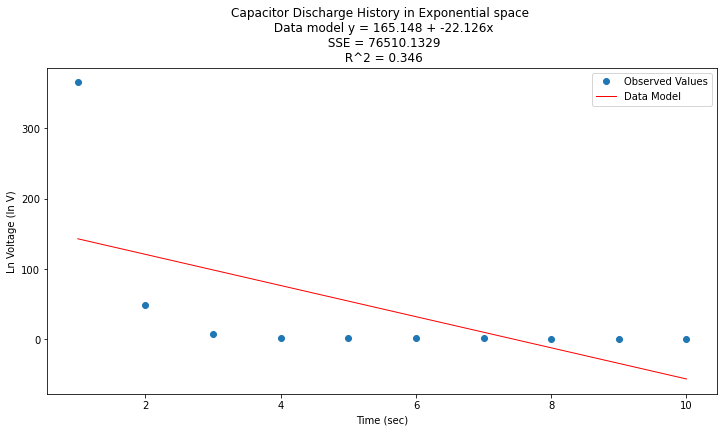

In [26]:
# Predict values
y_pred = model.predict()

beta0 = model.params[0] # the fitted intercept
beta1 = model.params[1]
sse = model.ssr
rsq = model.rsquared

titleline = "Capacitor Discharge History in Exponential space \n Data model y = " + str(round(beta0,3)) + " + " + str(round(beta1,3)) + "x" # put the model into the title
titleline = titleline + '\n SSE = ' + str(round(sse,4)) + '\n R^2 = ' + str(round(rsq,3)) 

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data2['X'], data2['Y'], 'o')           # scatter plot showing actual data
plt.plot(data2['X'], y_pred, 'r', linewidth=1)   # regression line
plt.xlabel('Time (sec)')
plt.ylabel('Ln Voltage (ln V)')
plt.legend(['Observed Values','Data Model'])
plt.title(titleline)

plt.show();


In [27]:
data2['X']

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: X, dtype: int64

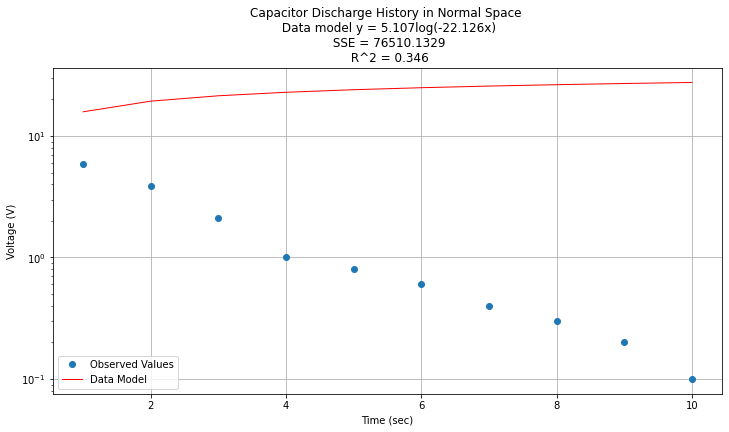

In [29]:
data2['Yorg']=data2['Y'].apply(math.log)
data2['Ymod']=math.log(beta0)*((-1)*beta1*data2['X']).apply(math.log)
#data.head()

titleline = "Capacitor Discharge History in Normal Space \n Data model y = " + str(round(math.log(beta0),3)) + "log(" + str(round(beta1,3)) + "x)" # put the model into the title
titleline = titleline + '\n SSE = ' + str(round(sse,4)) + '\n R^2 = ' + str(round(rsq,3)) 

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data2['X'], data2['Yorg'], 'o')           # scatter plot showing actual data
plt.plot(data2['X'], data2['Ymod'], 'r', linewidth=1)   # regression line
plt.yscale('log') # set y-axis to display a logarithmic scale #################
plt.xlabel('Time (sec)')
plt.ylabel('Voltage (V)')
plt.legend(['Observed Values','Data Model'])
plt.grid()
plt.title(titleline)

plt.show();